<a href="https://colab.research.google.com/github/rekhaa7/Ad-Project/blob/main/Ad_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: /content/ads.csv
100%|██████████| 4.76k/4.76k [00:00<00:00, 15.3MB/s]


**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Loading Dataset**

In [ ]:
data = pd.read_csv('/content/ads.csv')

In [ ]:
#Prints first five column of the data
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#Prints last five column of the data
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
#Counts the no. of rows and columns
data.shape

(200, 5)

Ad Dataset has 200 number of rows and 5 columns.

In [ ]:
#Prnts the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
#Checking missing values in each column
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [ ]:
# Dropping column 'Unnamed: 0' from the dataset as it only contains index values that do not have any impact on the other features or the target data.
data.drop(columns  = ['Unnamed: 0'], inplace = True)

In [ ]:
#Checking the dimension of the dataset after dropping column 'Unnamed: 0'
data.shape

(200, 4)

In [ ]:
#Prints first three column of the data after dropping column 'Unnamed: 0'
data .head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [ ]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


**Correlation Heatmap**

The correlation heatmap visually represents the relationships between the variables in the dataset.

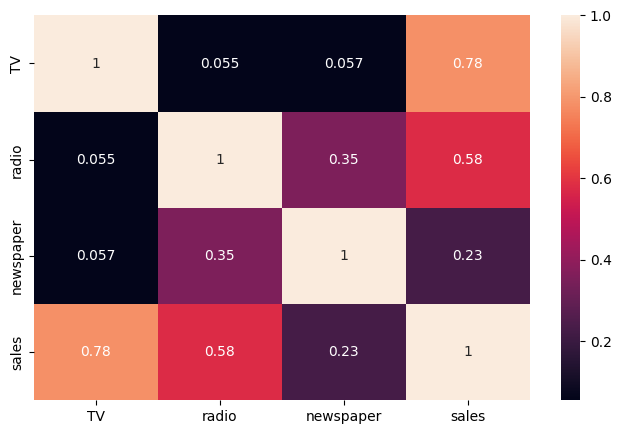

In [ ]:
plt.figure(figsize= (8,5))
sns.heatmap(data.corr(), annot = True)
plt.show()

From the above correlation heatmap, we can observe that there is strong positive correlation between features 'TV' and 'radio' and sales which means as TV or radio data increases, sales data also increases whereas there is weak positive correlation between 'newspaper' and sales.

**Splitting the data**

Selecting dependent and independent variable

In [ ]:
X = data[['TV']]  # Independent Variable
y = data['sales']  #Dependent Variable

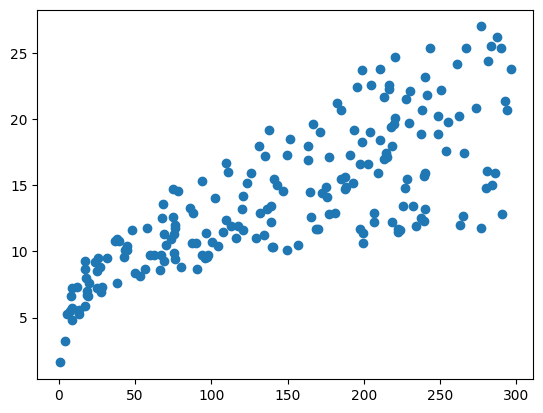

In [ ]:
# Plotting the relationship between X and Y
plt.scatter(x = X, y = y)
plt.show()

**Train-test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [ ]:
X_train.shape, y_train.shape

((140, 1), (140,))

In [ ]:
X_test.shape, y_test.shape

((60, 1), (60,))

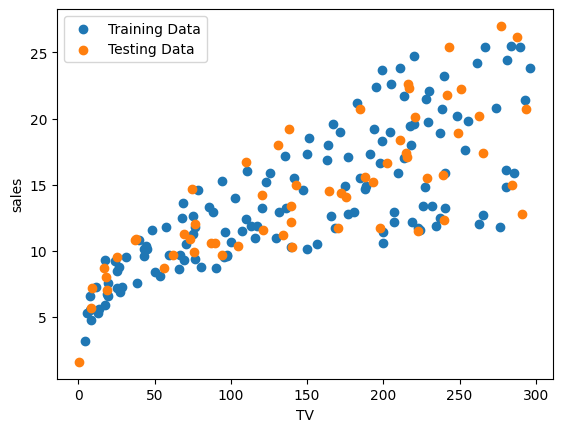

In [ ]:
# Scatter plot showing training and testing data
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test, label = 'Testing Data')
plt.xlabel('TV')
plt.ylabel('sales')
plt.legend()
plt.show()

**Training and Fitting the model**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

**Evaluation**

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
#Evaluation Metric
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error = {MSE}')
print(f'Mean Absolute Error = {MAE}')

Mean Squared Error = 10.440784676299034
Mean Absolute Error = 2.4181866411068182


In [ ]:
m = model.coef_
c = model.intercept_
print(f'The coefficient of model is {m}.')
print(f'The intercept of the model is {c}.')

The coefficient of model is [0.04732434].
The intercept of the model is 7.014711009828138.


Fitting into y = mx+c by plotting the regression line

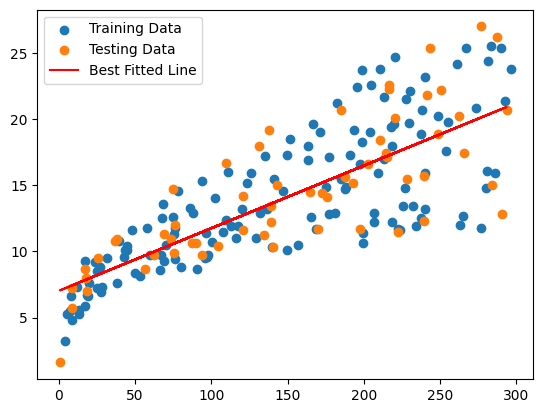

In [ ]:
plt.scatter(X_train, y_train, label = 'Training Data')
plt.scatter(X_test, y_test , label = 'Testing Data')
plt.plot(X_test, y_pred , label = 'Best Fitted Line', color = 'red')
plt.legend()
plt.show()

Making Predictions

In [ ]:
TV = 230.1
sales = model.predict([[TV]])
print('Predicted TV:' , sales)

Predicted TV: [17.90404085]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##Multiple Features

In [ ]:
X = data[['TV', 'radio', 'newspaper']]
y = data[['sales']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test,y_pred)
print(f'MSE= {MSE}')
print(f'MAE= {MAE}')

MSE= 4.275532860122865
MAE= 1.411330975222143


In [ ]:
TV = 230
radio = 90
newspaper = 50
sales = model.predict([[TV, radio, newspaper]])
print('Predicted Sales:' , sales)

Predicted Sales: [[30.86061067]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
